# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv(r"C:\Users\tonya\Desktop\SpringBoardAssignments\FrequentistCaseStudy\Frequentist_Case_Study\Frequentist Case Study\insurance2.csv")

In [4]:
medical.shape

(1338, 8)

In [80]:
medical.sample(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1159,32,0,41.100,0,0,3,3989.84100,1
1064,29,0,25.600,4,0,3,5708.86700,0
437,35,1,28.900,3,0,3,5926.84600,0
474,54,1,25.100,3,1,3,25382.29700,1
481,49,1,37.510,2,0,2,9304.70190,1
1252,20,1,27.300,0,1,3,16232.84700,1
79,41,0,32.965,0,0,1,6571.02435,1
278,59,1,31.790,2,0,2,12928.79110,0
671,29,0,31.160,0,0,0,3943.59540,1
1136,44,0,25.000,1,0,3,7623.51800,0


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<AxesSubplot:ylabel='Frequency'>

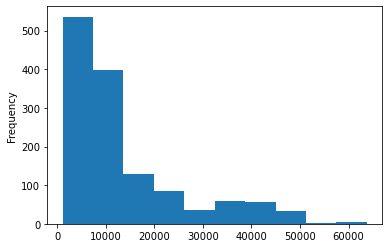

In [21]:
medical.charges.plot(kind='hist', bins= 10)

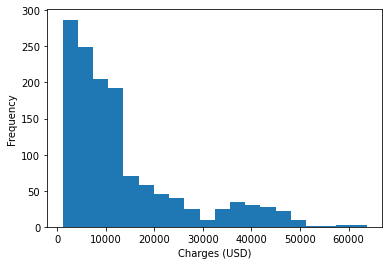

In [28]:
_ = plt.hist(medical.charges, bins= 20)
_ = plt.xlabel('Charges (USD)')
_ = plt.ylabel('Frequency')
plt.show()

(array([208., 174., 154., 140., 139., 119.,  55.,  32.,  42.,  36.,  23.,
         27.,  16.,  16.,   3.,  15.,  22.,  22.,  22.,  19.,  16.,  14.,
         16.,   2.,   1.,   1.,   0.,   1.,   1.,   2.]),
 array([ 1121.8739  ,  3210.159037,  5298.444174,  7386.729311,
         9475.014448, 11563.299585, 13651.584722, 15739.869859,
        17828.154996, 19916.440133, 22004.72527 , 24093.010407,
        26181.295544, 28269.580681, 30357.865818, 32446.150955,
        34534.436092, 36622.721229, 38711.006366, 40799.291503,
        42887.57664 , 44975.861777, 47064.146914, 49152.432051,
        51240.717188, 53329.002325, 55417.287462, 57505.572599,
        59593.857736, 61682.142873, 63770.42801 ]),
 [<matplotlib.patches.Polygon at 0x245218dc220>])

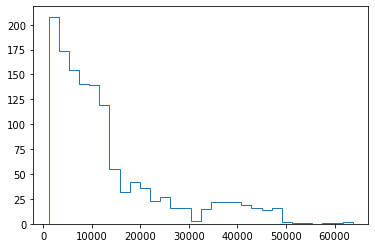

In [101]:
plt.hist(medical.charges, histtype='step', bins=30)

In [30]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [39]:
df_mean = medical.mean()
print('Mean of categories:\n', df_mean)


Mean of categories:
 age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64


In [42]:
df_std = medical.std(ddof=1)
print('STD of categories:\n',df_std)

STD of categories:
 age                  14.049960
sex                   0.500160
bmi                   6.098187
children              1.205493
smoker                0.403694
region                1.104885
charges           12110.011237
insuranceclaim        0.492871
dtype: float64


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [70]:
medical.charges.min()

1121.8739

In [88]:
medical.charges.describe().astype(int)

count     1338
mean     13270
std      12110
min       1121
25%       4740
50%       9382
75%      16639
max      63770
Name: charges, dtype: int32

In [103]:
(medical.charges).median()

9382.033

The average charge is $13,270. That is above the $12,000 that the admin is concerned about. The median is $9,382, so we need to make further investigation to come to more confident conclusion.
We can make a T-test by the mean and evaluate how significant is the mean, which is above the $12,000.
- null hypothesis: the mean of the charges is 13270.
- alternative hypothesis: the mean of the charges is not  13270

In [105]:
# perform one sample t-test
t_statistic, p_value = stats.ttest_1samp(a = medical.charges, popmean= 13270)
print('t_statistic', t_statistic)
print('p_value', p_value)

t_statistic 0.001275465575827519
p_value 0.9989825162581167


__A:__  This conclusion just confirms that the mean of $13,270 has very prominent place in the sample data. The admin's concern that most charges are bellow the threshold of $12,000 may rest at ease, for now.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided interval, as we are interested if the mean is greater then $12,000. 

In [140]:
med_len = len(medical) -1 # 1337
t_ppf =  t.ppf(0.95, df= 1337)  
t_ppf # 1.6459941145571317
med_charges_std = np.std(medical.charges)     # $12,105
med_charges_mean = np.mean(medical.charges)   #  $13,270
moe_med = t_ppf * (med_charges_std / (np.sqrt(med_len)))
moe_med     #   544.9350813250254
interv = (med_charges_mean - moe_med).astype(int), (med_charges_mean + moe_med).astype(int)
print('The interval is above $12,000 with 95% Confidence.', interv)

The interval is above $12,000 with 95% Confidence. (12725, 13815)


In [183]:
no_insur = medical.insuranceclaim == 0
# with_insur = 
med_ins = medical['insuranceclaim'] 
no_insur
medical['no_insur']  = ( med_ins == 0 )
medical['no_insur'] 
n = medical['insuranceclaim'].nunique()
n
med_ins = medical[medical['insuranceclaim'] == 1]
no_insur = medical[medical['insuranceclaim'] == 0]
med_ins.shape # (783, 9)
no_insur.shape # (555, 9)
np.mean(med_ins.charges)  # $16,423
np.mean(no_insur.charges)  # $8,821



8821.421892306294

- There are 783 patients who has used insurance for payment, vs 555 who had used out of pocket payment.
- The average insurance payment was $16,423 vs no insurance average of $8,821. So the difference is on average 53% higher charges for people with insurance.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Assumption made is that the variance is similar between both groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [192]:
from scipy.stats import ttest_ind
ttest_ind(med_ins.charges, no_insur.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The documentation has info on z-score not z-test. Z-tests, not pertaining to scipy.stats, should be done when dealing with entire populations, as described in some documents or on populations larger then 30. STD should be known.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test